In [82]:
using OffsetArrays


MS(f...) = minimum(abs.(f))*prod(sign.(f))

function iter3(p)
    p1 = copy(p)
    p1 .= 0.0
    for f1=-N:N
        for f2=-N:N
            for s1 = (-1,1)
                for s2 = (-1,1)
                    f = MS(f1+s1,f2+s2)
                    if f in -N:N
                        p1[f] += p[f1]*p[f2]/4
                    end
                end
            end
        end
    end
    p1 / sum(p1)
end

iter3 (generic function with 1 method)

\begin{align*}
p\left(f\right)= & \frac{1}{2^{k}}\sum_{f_{1},\dots,f_{k}}\sum_{s_{1},\dots,s_{k}}\delta\left(f;\min_{j=1,\dots,k}\left|f_{j}+s_{j}\right|\prod_{j=1}^{k}\text{sign}\left(f_{j}+s_{j}\right)\right)\prod_{j=1}^{k}p\left(f_{j}\right)\\
= & \sum_{f_{1},\dots,f_{k}}\delta\left(f;\min_{j=1,\dots,k}\left|f_{j}\right|\prod_{j=1}^{k}\text{sign}\left(f_{j}\right)\right)\prod_{j=1}^{k}\frac{1}{2}\sum_{s_{j}}p\left(f_{j}-s_{j}\right)\\
= & \begin{cases}
\frac{1}{2}\sum_{f_{1},\dots,f_{k}>0}\delta\left(f;\min_{j=1,\dots,k}f_{j}\right)\prod_{j=1}^{k}\sum_{s_{j}}p\left(f_{j}-s_{j}\right) & \text{ for }f\neq0\\
\sum_{n=1}^{k}\binom{k}{n}\left(\frac{1}{2}\sum_{s_{j}}p\left(s_{j}\right)\right)^{k-n}\left(\sum_{f'>0}\sum_{s}p\left(f'-s\right)\right)^{n} & \text{ for }f=0
\end{cases}\\
= & \begin{cases}
\frac{1}{2}\left\{ \left(\sum_{f'\geq f}\sum_{s}p\left(f'+s\right)\right)^{k}-\left(\sum_{f'>f}\sum_{s}p\left(f'+s\right)\right)^{k}\right\}  & \text{ for }f\neq0\\
\sum_{n=1}^{k}\binom{k}{n}\left(\frac{1}{2}\sum_{s}p\left(s\right)\right)^{k-n}\left(\sum_{f'>0}\sum_{s}p\left(f'+s\right)\right)^{n} & \text{ for }f=0
\end{cases}\\
= & \begin{cases}
\frac{1}{2}\left\{ \left(\sum_{f'\geq f}\sum_{s\in\pm1}p\left(f'+s\right)\right)^{k}-\left(\sum_{f'>f}\sum_{s\in\pm1}p\left(f'+s\right)\right)^{k}\right\}  & \text{ for }f\neq0\\
\left(\frac{1}{2}\sum_{s\in\pm1}p\left(s\right)+\sum_{f'>0}\sum_{s\in\pm1}p\left(f'+s\right)\right)^{k}-\left(\sum_{f'>0}\sum_{s\in\pm1}p\left(f'+s\right)\right)^{k} & \text{ for }f=0
\end{cases}
\end{align*}


In [309]:
function iter(p,k)
    p1 = copy(p)
    p1 .= 0.0
    N = lastindex(p1)-1
    for f = 1:N
        v1 = p[f+1]+p[f-1]
        v2 = sum((p[f1+1]+p[f1-1] for f1=f+1:N), init=0.0)
        v = (v1+v2)^k-v2^k
        p1[+f] = v/2
        p1[-f] = v/2
    end
    v1 = (p[1]+p[-1])/2
    v2 = sum(p[f1+1]+p[f1-1] for f1=1:N)
    p1[0] = (v1+v2)^k-v2^k
    p1 ./ sum(p1)
end

iter (generic function with 2 methods)

In [307]:
N=10
p=OffsetArray(rand(2N+3), -N-1:N+1);
p ./ sum(p);

In [312]:
q1 = copy(p)
q2 = copy(p)
for i=1:1000; 
    q1 = iter(q1,2)
    q2 = iter3(q2)
end

[q1 q2]

23×2 Matrix{Float64}:
 0.0           0.0
 0.0           0.0
 1.48172e-216  1.48172e-216
 1.72146e-108  1.72146e-108
 1.85551e-54   1.85551e-54
 1.9264e-27    1.9264e-27
 6.2071e-14    6.2071e-14
 3.52338e-7    3.52338e-7
 0.000839097   0.000839097
 0.0401346     0.0401346
 0.244452      0.244452
 0.429148      0.429148
 0.244452      0.244452
 0.0401346     0.0401346
 0.000839097   0.000839097
 3.52338e-7    3.52338e-7
 6.2071e-14    6.2071e-14
 1.9264e-27    1.9264e-27
 1.85551e-54   1.85551e-54
 1.72146e-108  1.72146e-108
 1.48172e-216  1.48172e-216
 0.0           0.0
 0.0           0.0

In [313]:
[q  p]

23×2 Matrix{Float64}:
 0.0           0.758644
 0.0           0.00774879
 1.56956e-216  0.466098
 1.6736e-108   0.1391
 1.88131e-54   0.151726
 1.91342e-27   0.2668
 6.22767e-14   0.676877
 3.51767e-7    0.889877
 0.000839764   0.395144
 0.040118      0.085948
 0.244522      0.354258
 0.42904       0.659526
 0.244522      0.519472
 0.040118      0.693698
 0.000839764   0.537052
 3.51767e-7    0.1486
 6.22767e-14   0.941301
 1.91342e-27   0.347262
 1.88131e-54   0.695816
 1.6736e-108   0.755186
 1.56956e-216  0.239789
 0.0           0.716014
 0.0           0.248901

$u_{ai}\left(\sigma_{i}\right)=\sigma_{i}f_{ai}+g_{ai}$

\begin{align*}
u_{ai}\left(\sigma_{i}\right)= & \max_{\{\sigma_{j}:j\in\partial a\setminus i\}:\prod_{j}\sigma_{j}=1}\sum_{j\in\partial a\setminus i}u_{ja}\left(\sigma_{j}\right)+\sigma_{j}s_{j}+const\\
b_{i}\left(\sigma_{i}\right)= & u_{ai}\left(\sigma_{i}\right)+u_{bi}\left(\sigma_{i}\right)+\sigma_{i}s_{i}+const=b_{i}\sigma_{i}+const\\
b_{i}= & \frac{1}{2}\left[f_{ai}+f_{bi}+s_{i}-\left(-f_{ai}-f_{bi}-s_{i}\right)\right]\\
b_{i}= & f_{ai}+f_{bi}+s_{i}\\
D= & \max_{\sigma_{i}}\sigma_{i}\left(b_{i}+s_{i}\right)-\max_{\sigma_{i}}b_{i}\sigma_{i}\\
= & \left|b_{i}+s_{i}\right|-\left|b_{i}\right|\\
= & s_{i}\text{sign}\left(b_{i}\right)\\
= & s_{i}\text{sign}\left(f_{ai}+f_{bi}+s_{i}\right)\\
= & \max_{\sigma_{i}}\left(b\left(\sigma_{i}\right)+\sigma_{i}s_{i}\right)-\max_{\sigma_{i}}b\left(\sigma_{i}\right)\\
= & \text{sign}\left(u_{ai}\left(\sigma_{i}\right)+u_{bi}\left(\sigma_{i}\right)+\sigma_{i}s_{i}\right)s_{i}\\
\sigma_{i}f_{ai}= & \max_{\{\sigma_{j}:j\in\partial a\setminus i\}:\prod_{j}\sigma_{j}=1}\sum_{j\in\partial a\setminus i}f_{ja}\sigma_{j}+\sigma_{j}s_{j}+const\\
f_{ai}= & \frac{1}{2}\left[\max_{\{\sigma_{j}:j\in\partial a\setminus i\}:\prod_{j\neq i}\sigma_{j}=1}\left(\sum_{j\in\partial a\setminus i}\left(f_{ja}+s_{j}\right)\sigma_{j}\right)-\max_{\{\sigma_{j}:j\in\partial a\setminus i\}:\prod_{j\neq i}\sigma_{j}=-1}\left(\sum_{j\in\partial a\setminus i}\left(f_{ja}+s_{j}\right)\sigma_{j}\right)\right]\\
= & \frac{1}{2}\begin{cases}
\sum_{j\in\partial a\setminus i}\left|f_{ja}+s_{j}\right| & \text{if }\prod\left(f_{ja}+s_{j}\right)>0\\
\sum_{j\in\partial a\setminus i}\left|f_{ja}+s_{j}\right|-2\min_{j\in\partial a\setminus i}\left|f_{ja}+s_{j}\right| & \text{if }\prod\left(f_{ja}+s_{j}\right)<0
\end{cases}-\\
 & -\frac{1}{2}\begin{cases}
\sum_{j\in\partial a\setminus i}\left|f_{ja}+s_{j}\right| & \text{if }\prod\left(f_{ja}+s_{j}\right)<0\\
\sum_{j\in\partial a\setminus i}\left|f_{ja}+s_{j}\right|-2\min_{j\in\partial a\setminus i}\left|f_{ja}+s_{j}\right| & \text{if }\prod\left(f_{ja}+s_{j}\right)>0
\end{cases}\\
= & \begin{cases}
\min_{j\in\partial a\setminus i}\left|f_{ja}+s_{j}\right| & \text{if }\prod\left(f_{ja}+s_{j}\right)>0\\
-\min_{j\in\partial a\setminus i}\left|f_{ja}+s_{j}\right| & \text{if }\prod\left(f_{ja}+s_{j}\right)<0
\end{cases}\\
f_{ai}= & \min_{j\in\partial a\setminus i}\left|f_{ja}+s_{j}\right|\prod_{j\in\partial a\setminus i}\text{sign}\left(f_{ja}+s_{j}\right)\\
p\left(f\right)= & \frac{1}{2^{k}}\sum_{f_{1},\dots,f_{k}}\sum_{s_{1},\dots,s_{k}}\delta\left(f;\min_{j=1,\dots,k}\left|f_{j}+s_{j}\right|\prod_{j=1}^{k}\text{sign}\left(f_{j}+s_{j}\right)\right)\prod_{j=1}^{k}p\left(f_{j}\right)\\
O= & \frac{1}{2}\sum_{f_{1},f_{2}}\sum_{s\in\pm1}\left(s\text{sign}\left(f_{1}+f_{2}+s\right)\right)p\left(f_{1}\right)p\left(f_{2}\right)
\end{align*}




In [83]:
using PyPlot

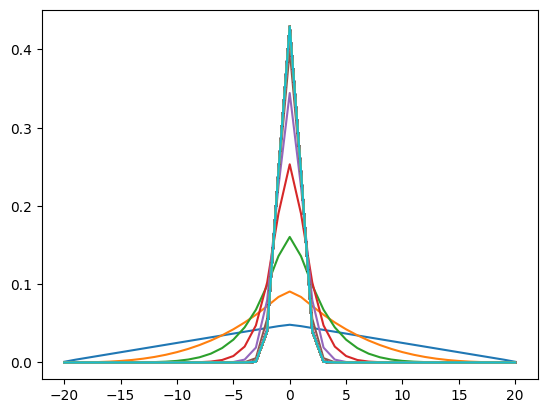

In [122]:
N=20
p = OffsetArray(zeros(2N+1), -N:N)
p .= 1/length(p)
#p .= 1/(2N+1)

for i=1:100
    p=iter3(p)
    plot(-N:N, p)
end

In [123]:
p[-10:10]

21-element Vector{Float64}:
 0.0
 1.5086692108953086e-216
 1.706339325376911e-108
 1.8635469215423086e-54
 1.9223317762149526e-27
 6.21352776458719e-14
 3.521591474559532e-7
 0.0008393058263258842
 0.040129382772451316
 0.24447401379036618
 0.4291138909032941
 0.24447401379036618
 0.0401293827724513
 0.0008393058263258841
 3.5215914745595315e-7
 6.21352776458719e-14
 1.9223317762149526e-27
 1.8635469215423086e-54
 1.706339325376911e-108
 1.5086692108953086e-216
 0.0

In [124]:
function overlap(p)
    O = 0.0
    for f1=-N:N
        for f2=-N:N
            for s=(-1,1)
                O += 0.5s*sign(f1+f2+s)*p[f1]*p[f2]
            end
        end
    end
    O
end

overlap (generic function with 1 method)

In [125]:
overlap(p)

0.536398897155848

In [126]:
distortion(p)=0.5(1-overlap(p))

distortion (generic function with 1 method)

In [127]:
distortion(p)

0.231800551422076

In [128]:
iter(p) = sum(degp(k)*iter(p,k) for k=degrees)

iter (generic function with 1 method)